- The Neuroproof data requires hdf5 datasets under the key 'stack'

In [1]:
%matplotlib inline 
import os
import matplotlib
import os.path as op
import matplotlib.cm as cm
import numpy as np
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
import h5py
import array
from visualize_funcs import display_preds,display_seg,trim,formatAndSave,load_seg_from_dat,display_two_segs,trim_seg

In [2]:
#Open training labels
gt_seg_file = "/tier2/turaga/singhc/neuroproof/validation_sample/groundtruth.h5"
g = h5py.File(gt_seg_file, 'r')
label_set = np.asarray(g['stack'],dtype='float32') #3,z,y,x
print label_set.shape
print np.min(label_set)
print np.max(label_set)

(520, 520, 520)
2.0
6210.0


(520, 520, 520)
(520, 520, 520)
after:
(520, 520, 520)
(520, 520, 520)


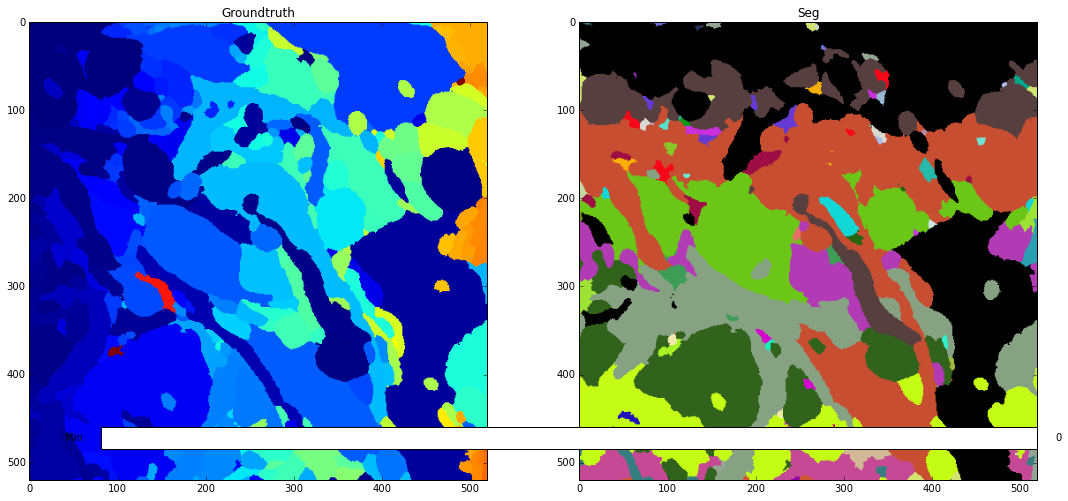

In [21]:
# loading seg
seg_file = "/tier2/turaga/singhc/neuroproof/validation_sample/results/segmentation.h5"
# loading h5
hdf5_seg = h5py.File(seg_file, 'r')
seg_neuroproof = np.asarray(hdf5_seg['stack'],dtype='uint32')
print label_set.shape
print seg_neuroproof.shape
data_set,label_set=trim(label_set,label_set,seg_neuroproof)
print 'after:'
print label_set.shape
print seg_neuroproof.shape
display_two_segs(label_set, seg_neuroproof, im_size=label_set.shape[0], im2_size=seg_neuroproof.shape[0])

In [14]:
hdf5_seg['stack'].ipynb_

<HDF5 dataset "stack": shape (520, 520, 520), type "<u4">

### Copy and save gt with 'stack' as key

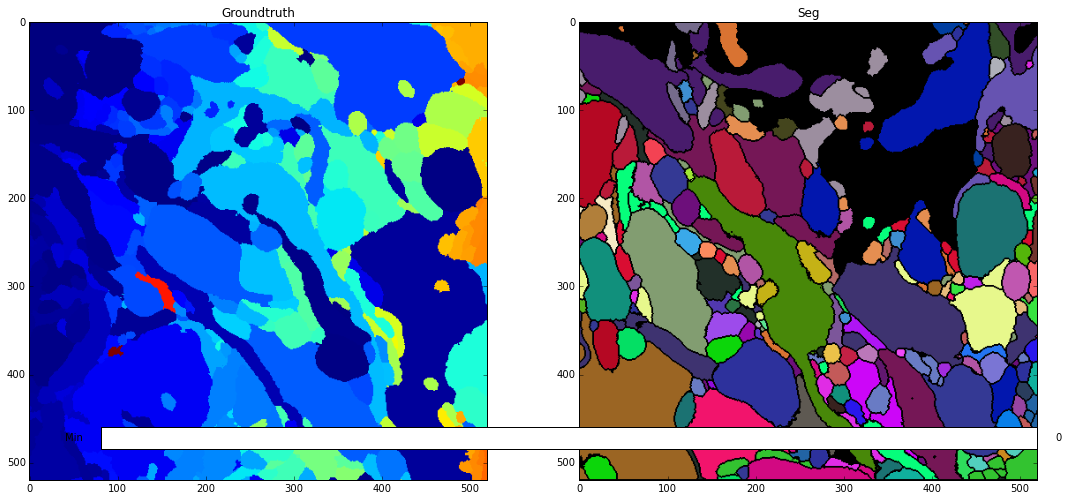

In [3]:
seg_file_gt = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_seg_thick.h5'
hdf5_seg = h5py.File(seg_file_gt, 'r')
seg = np.asarray(hdf5_seg['main'],dtype='uint32')

f = h5py.File("/tier2/turaga/singhc/neuroproof/fibsem_gt_seg.h5", "w")
f["stack"] = seg+1
f.close()

segSmall = seg[0:50][0:50][0:50]
f2 = h5py.File("/tier2/turaga/singhc/neuroproof/fibsem_gt_seg_small.h5", "w")
f2["stack"] = segSmall+1
f2.close()

display_two_segs(label_set, seg+1, im_size=label_set.shape[0], im2_size=seg.shape[0])

segTrim = trim_seg(seg,432)
f2 = h5py.File("/tier2/turaga/singhc/neuroproof/fibsem_gt_seg_trimmed.h5", "w")
f2["stack"] = segTrim+1
f2.close()

In [25]:
print np.min(label_set)
print np.max(label_set)

print np.min(seg)
print np.max(seg)

2.0
6210.0
0
4446


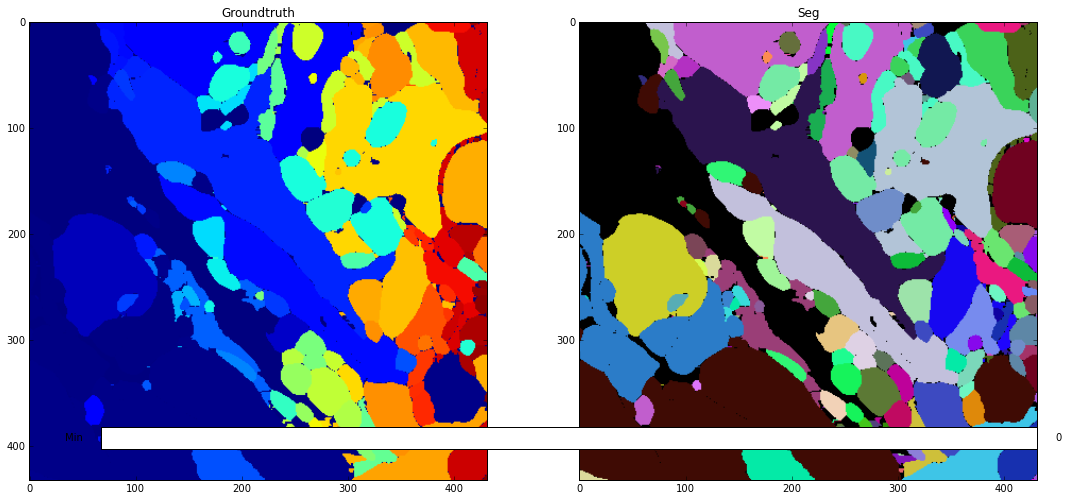

In [32]:
dat_seg_file = '/groups/turaga/home/singhc/evaluation/data_tier2/train/out/fibsem3_200000/square/100000.dat'
seg = load_seg_from_dat(dat_seg_file)
display_two_segs(seg, seg+1, im_size=seg.shape[0], im2_size=seg.shape[0])

f = h5py.File("/tier2/turaga/singhc/neuroproof/fibsem3_200000_100000.h5", "w")
f["stack"] = seg+1
f.close()

In [ ]:
import sys
sys.modules.clear(  )